**Dataset Information:** The dataset consists of feature vectors of 12,330 sessions and each session belong to a different user in a 1-year period.

**Attribute Information: Numerical features**

Administrative: Number of pages visited by the visitor about account management.<br>
Administrative duration: Total amount of time (in seconds) spent by the visitor on account management related pages.<br>
Informational: Number of pages visited by the visitor about Web site, communication and address information of the shopping site.<br>
Informational duration: Total amount of time (in seconds) spent by the visitor on informational pages.<br>
Product related: Number of pages visited by visitor about product related pages.<br>
Product related duration: Total amount of time (in seconds) spent by the visitor on product related pages.<br>
Bounce rate Average bounce rate value of the pages visited by the visitor.<br>
Exit rate Average exit rate value of the pages visited by the visitor.<br>
Page value Average page value of the pages visited by the visitor.<br>
Special day Closeness of the site visiting time to a special day.<br>

**Categorical Features**

OperatingSystems: Operating system of the visitor.<br>
Browser: Browser of the visitor.<br>
Region: Geographic region from which the session has been started by the visitor.<br>
TrafficType: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct).<br>
VisitorType: Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’.<br>
Weekend: Boolean value indicating whether the date of the visit is weekend.<br>
Month: Month value of the visit date.<br>
Revenue: Class label indicating whether the visit has been finalized with a transaction.<br>

In [1]:
import numpy as np
import pandas as pd

#data plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Matplotlib figure configurations
title_fontsize = 20
label_fontsize = 15
plt.rcParams['font.size'] = 15

#data preparation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler

#classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.neural_network import MLPClassifier

#neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#SMOTE import for class balancing
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data = '/content/gdrive/MyDrive/data mining/project/dataset.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Visualizing the data

In [3]:
#reading the dataset to dataframe
dataset= pd.read_csv(data,header=0,encoding='unicode_escape')
print(dataset.head())
print(dataset.shape)

dataset.describe().transpose()

   Administrative  Administrative_Duration  ...  Weekend  Revenue
0               0                      0.0  ...    False    False
1               0                      0.0  ...    False    False
2               0                      0.0  ...    False    False
3               0                      0.0  ...    False    False
4               0                      0.0  ...     True    False

[5 rows x 18 columns]
(12330, 18)


,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [4]:
#printing dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
#checking the null values
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

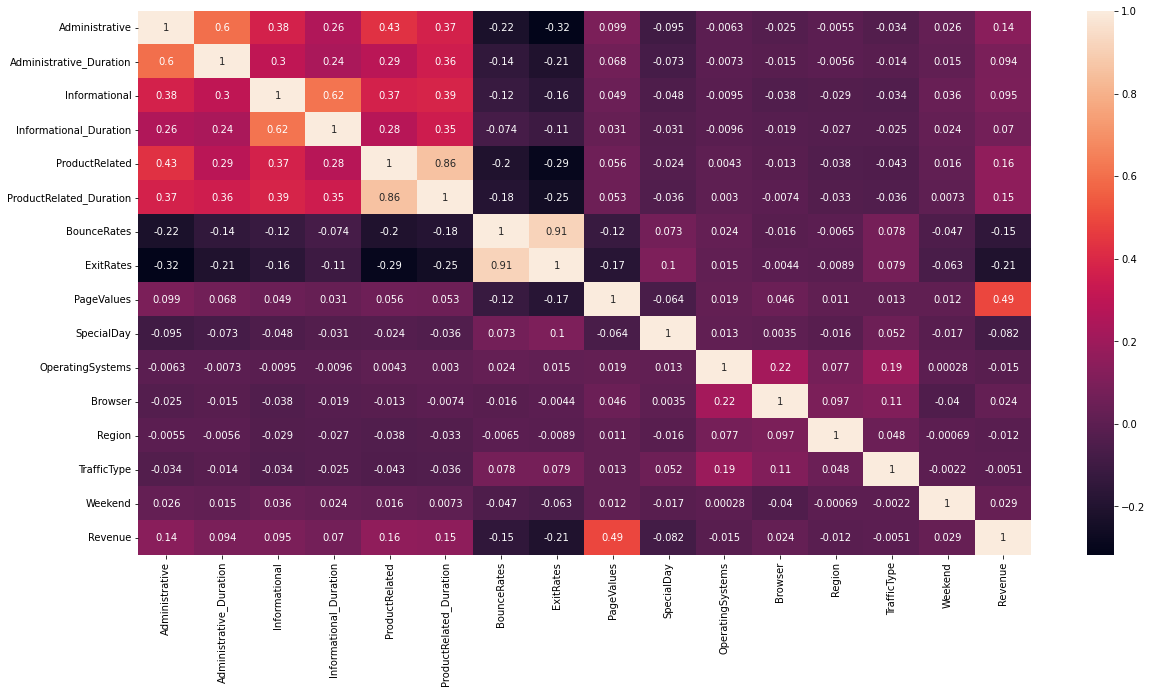

In [6]:
#visualizing the data correlation using heatmap
plt.figure(figsize = (20,10))
sns.heatmap(dataset.corr(), annot=True)

In [7]:
#verify the changed datatypes
dataset.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Analyzing the Target variable

In [8]:
#Displaying the count of target variables
dataset['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


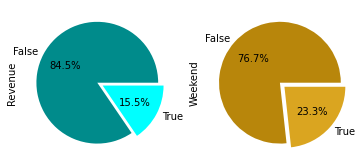

In [9]:
#Displaying the percentage of the revenue
revenue_percentage = dataset['Revenue'].value_counts()/dataset.shape[0]
print(revenue_percentage)

#displaying the revenue 
fig,ax = plt.subplots(1,2)
explode = [0, 0.1]
dataset.Revenue.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0],colors = ['darkcyan','cyan'],explode = explode);
dataset.Weekend.value_counts().plot.pie(autopct="%.1f%%",ax = ax[1],colors = ['darkgoldenrod','goldenrod'],explode = explode);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


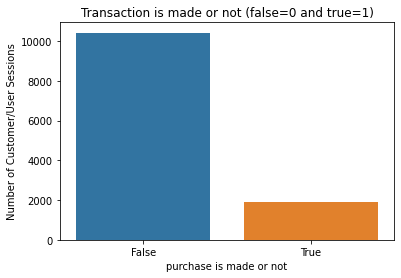

In [10]:
#Visualizing the revenue graph
sns.countplot('Revenue', data = dataset)
plt.xlabel('purchase is made or not')
plt.ylabel('Number of Customer/User Sessions')
plt.title('Transaction is made or not (false=0 and true=1)')
plt.show()

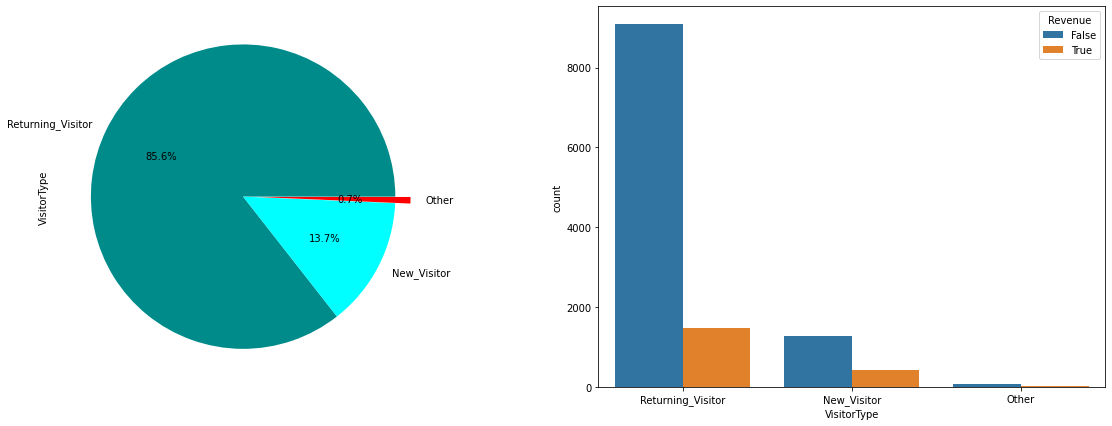

In [11]:
#plotting customer type and its count
fig,ax = plt.subplots(1,2,figsize = (20,7))

explode = [0, 0, 0.1]
dataset.VisitorType.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0],colors = ['darkcyan','cyan', 'red'],explode = explode);
sns.countplot(x="VisitorType",data=dataset,hue="Revenue",ax = ax[1])

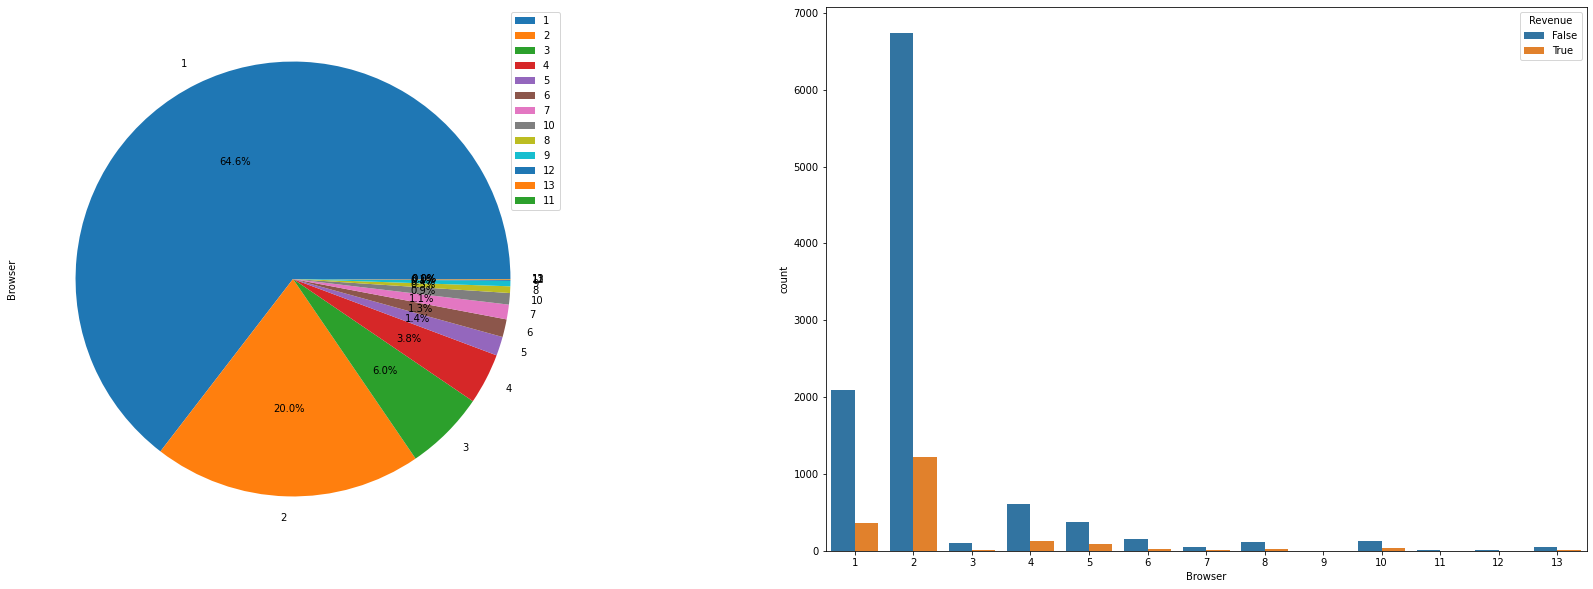

In [12]:
#plotting browser and its count and viewing the revenue respective to it
fig,ax = plt.subplots(1,2,figsize = (30,10))
labels = dataset.Browser.unique()
dataset.Browser.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0], labels = labels)
ax[0].legend()
sns.countplot(x="Browser",data=dataset,hue="Revenue",ax = ax[1])

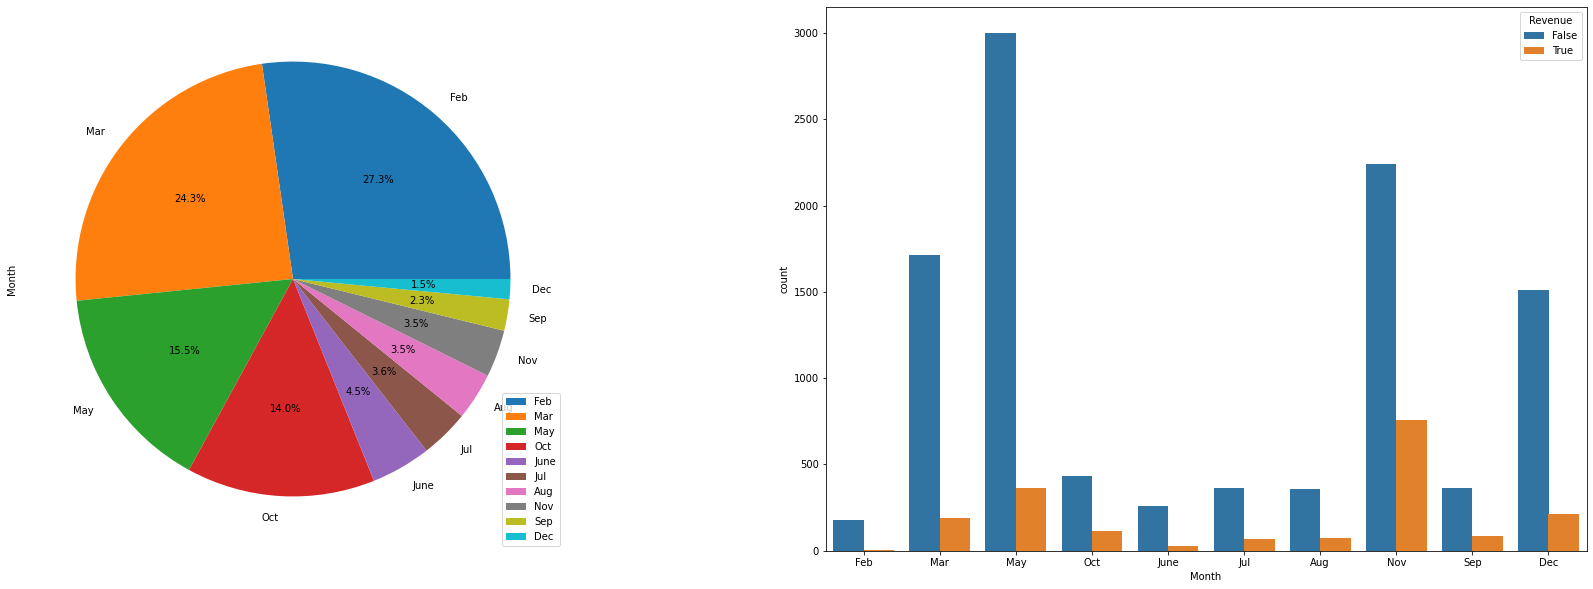

In [13]:
#plotting month and its distribution with the revenue
fig,ax = plt.subplots(1,2,figsize = (30,10))
labels = dataset.Month.unique()
dataset.Month.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0], labels = labels)
ax[0].legend()
sns.countplot(x="Month",data=dataset,hue="Revenue",ax = ax[1])

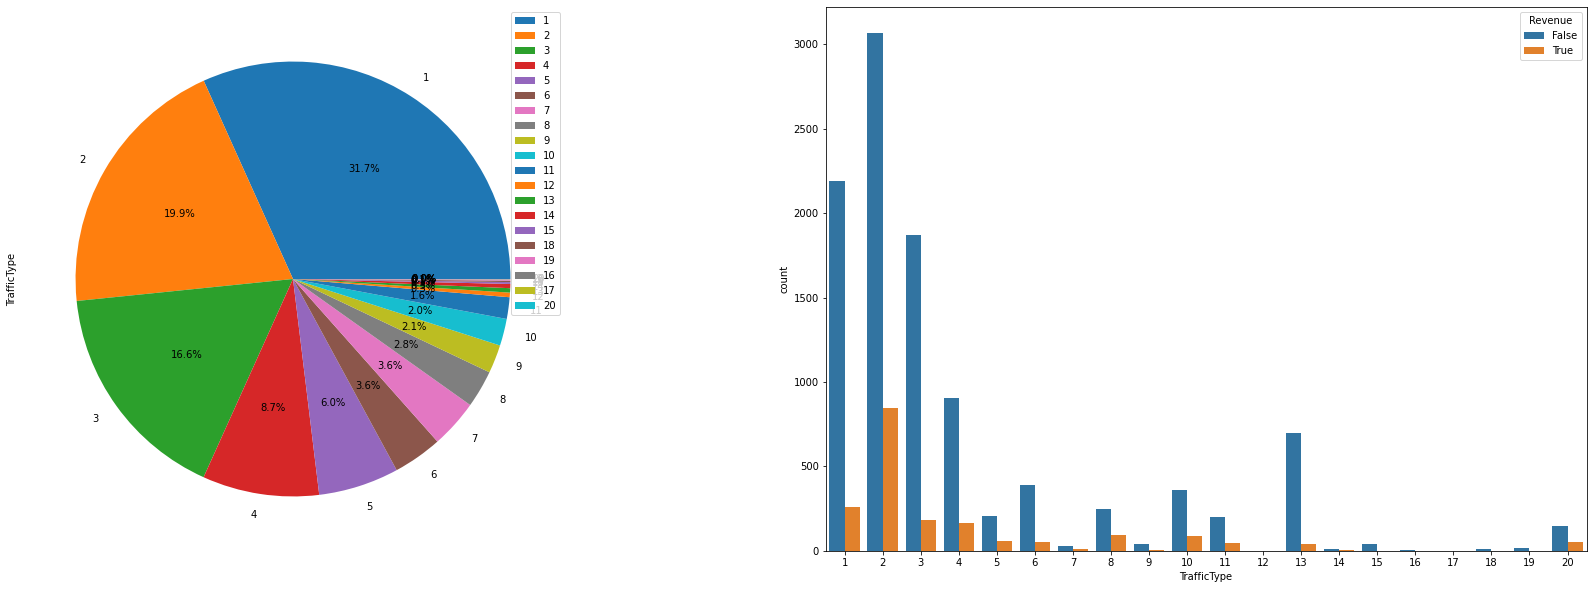

In [14]:
#plotting traffictype and its distribution with revenue
fig,ax = plt.subplots(1,2,figsize = (30,10))
labels = dataset.TrafficType.unique()
dataset.TrafficType.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0], labels = labels);
ax[0].legend()
sns.countplot(x="TrafficType",data=dataset,hue="Revenue",ax = ax[1])

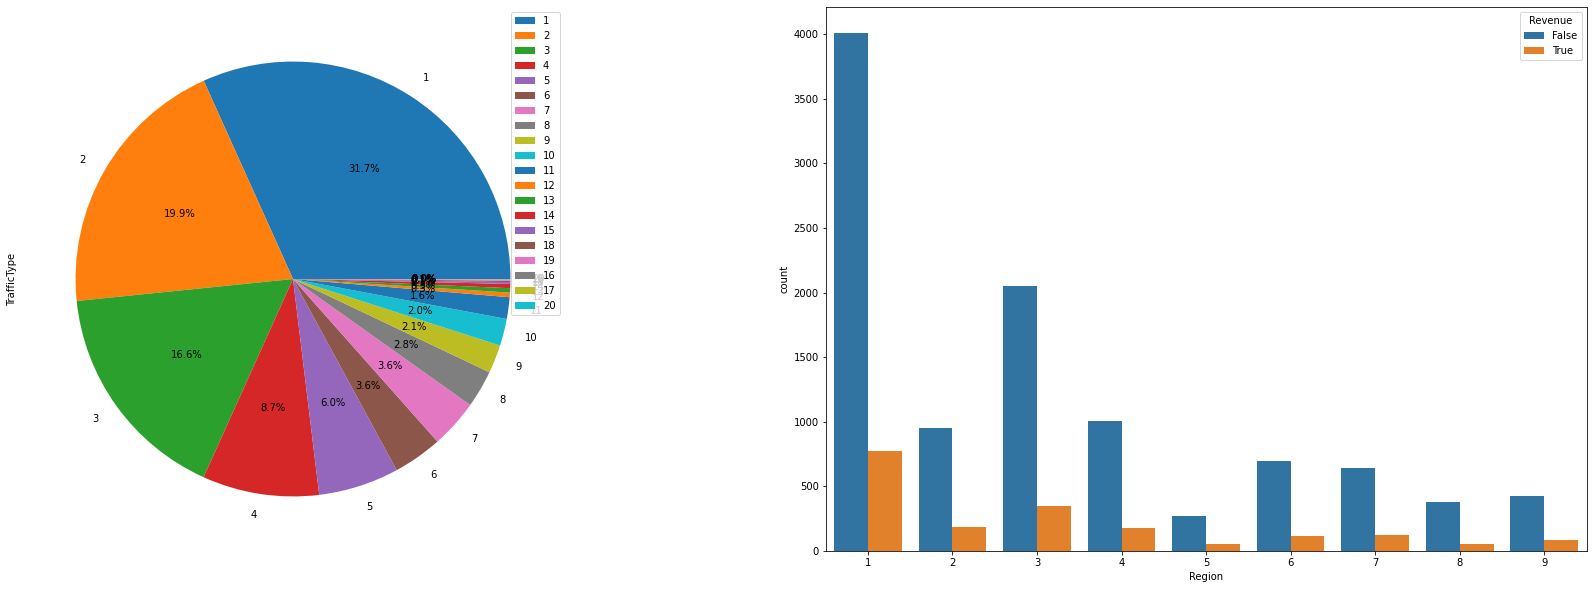

In [15]:
#plotting region and its distribution with revenue
fig,ax = plt.subplots(1,2,figsize = (30,10))
labels = dataset.TrafficType.unique()
dataset.TrafficType.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0], labels = labels);
ax[0].legend()
sns.countplot(x="Region",data=dataset,hue="Revenue",ax = ax[1])

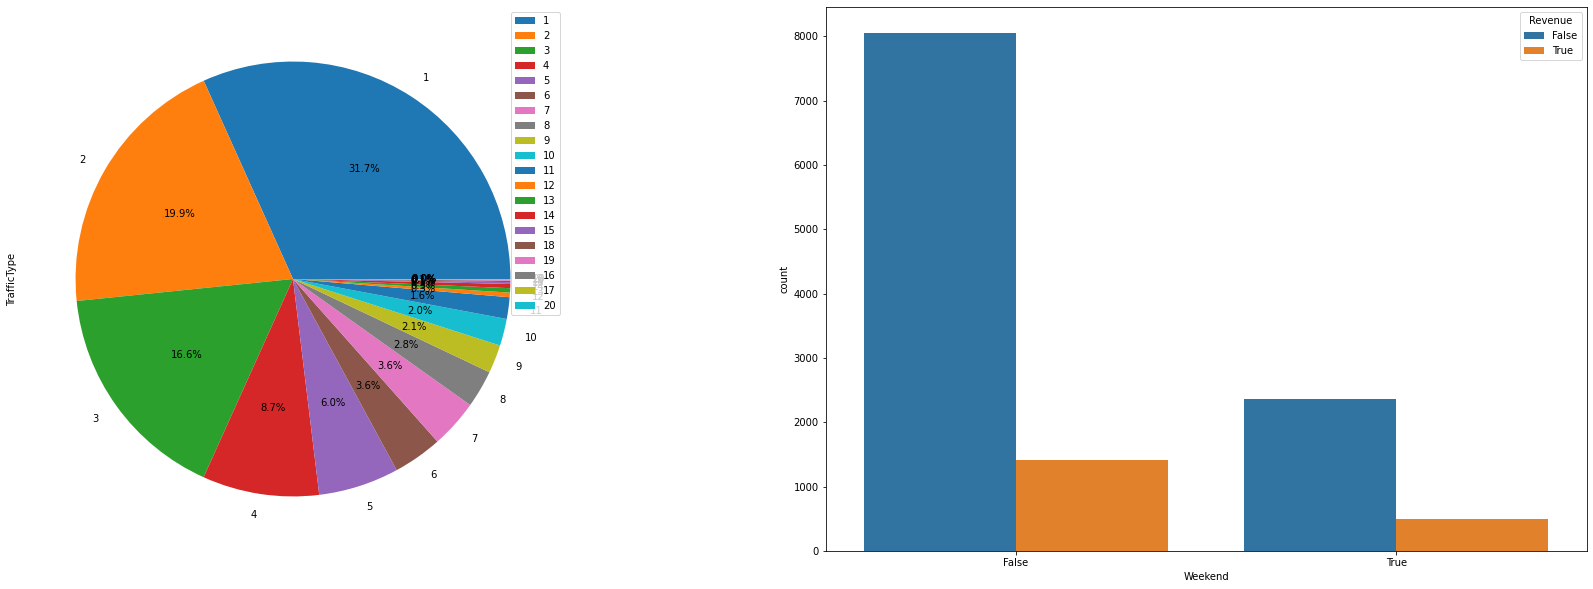

In [16]:
#plotting weekend and its distribution with revenue
fig,ax = plt.subplots(1,2,figsize = (30,10))
labels = dataset.TrafficType.unique()
dataset.TrafficType.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0], labels = labels);
ax[0].legend()
sns.countplot(x="Weekend",data=dataset,hue="Revenue",ax = ax[1])

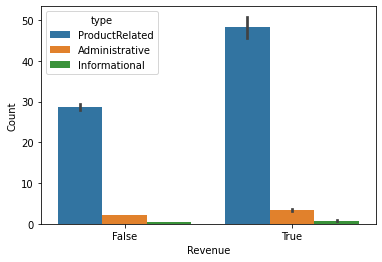

In [17]:
#displaying the distribution for productrelated, administrative and informational with respect to revenue
distribution_data = pd.melt(dataset[['ProductRelated','Administrative','Informational','Revenue']], id_vars='Revenue', var_name="type", value_name="Count")
sns.barplot(x='Revenue', y='Count', hue='type', data=distribution_data)

**EDA**

In [18]:
#Taking the categorical features
categorical_features = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

In [19]:
# Create dataframe for categorical variables and numerical variables.
numerical_df = dataset.loc[:, ~dataset.columns.isin(['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'])]
categorical_df = dataset[['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']]

In [20]:
print(numerical_df.columns)
print(categorical_df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')
Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

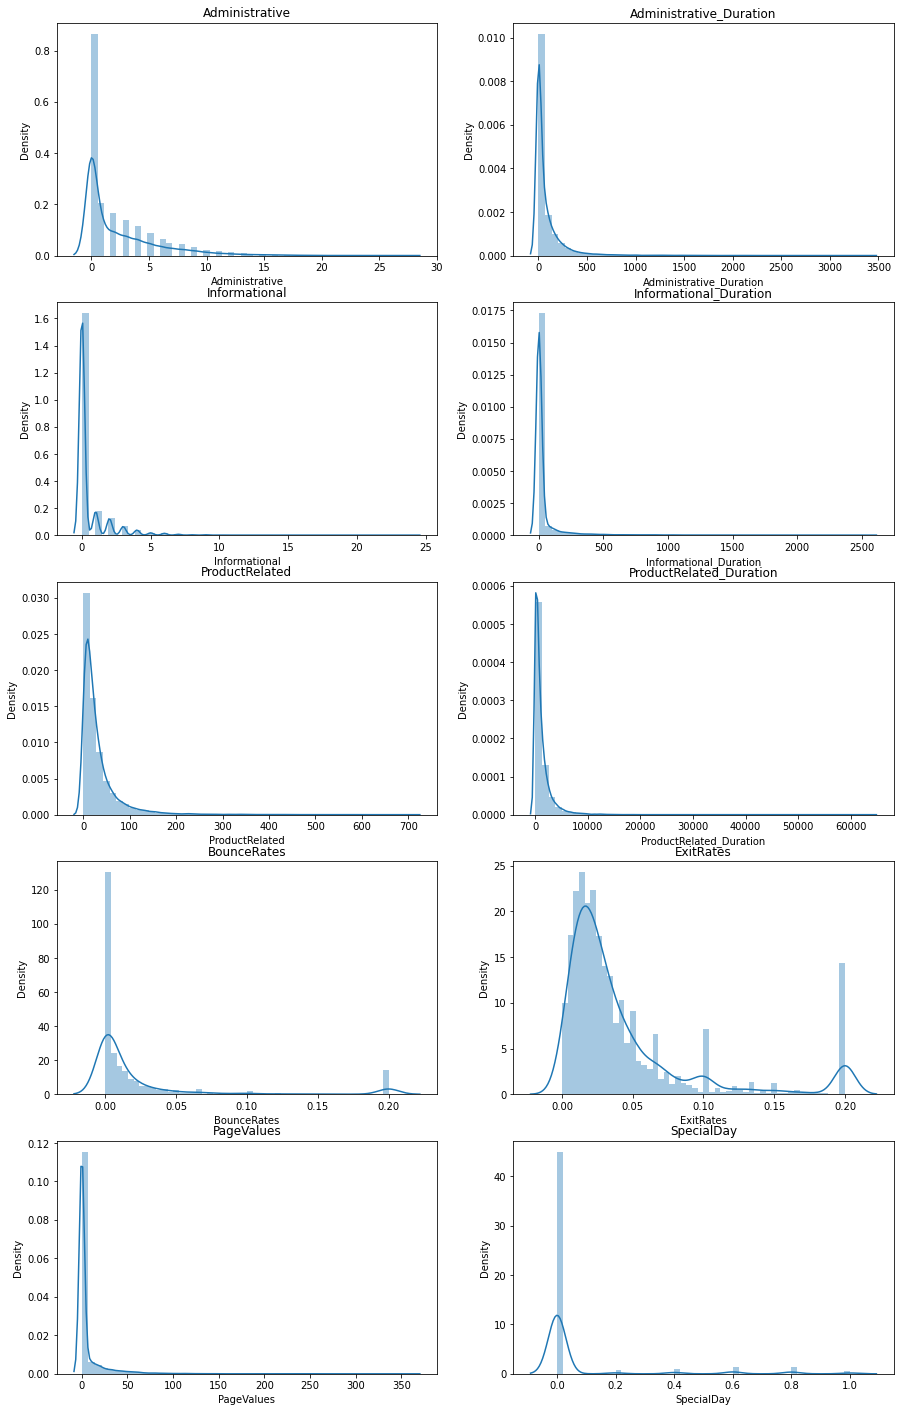

In [21]:
#checking the distribution of numeric variables.
num_all_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(15, 30))

for i in range(len(num_all_columns)):
    plt.subplot(6, 2, i + 1)
    sns.distplot(numerical_df[num_all_columns[i]])
    plt.title(num_all_columns[i])

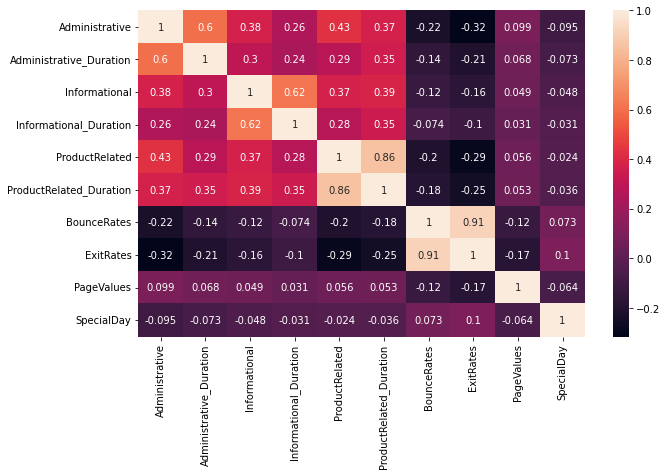

In [22]:
# Check for multicollinearity with a heatmap.
correlation_matrix = round(numerical_df.corr(), 3)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [23]:
#Because of high correlation to another variable we are dropping few columns.
new_numercial_df = numerical_df.drop(['ProductRelated', 'ExitRates'], 1)

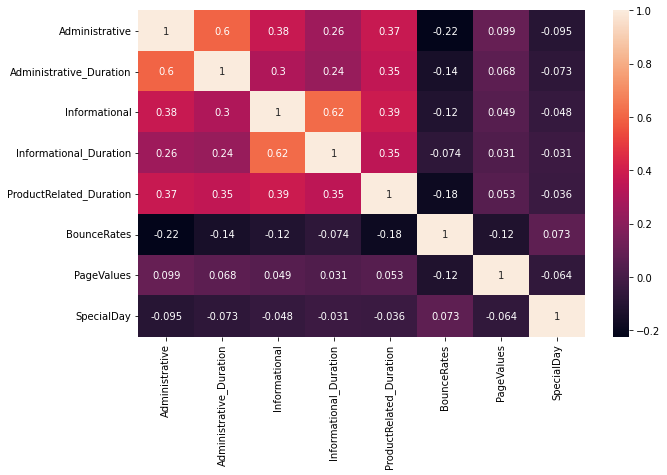

In [24]:
# checking multicollinearity after dropping ProductRelated and ExitRates.
new_corr_matrix = round(new_numercial_df.corr(), 3)

plt.figure(figsize=(10,6))
sns.heatmap(new_corr_matrix, annot=True)
plt.show()


In [25]:
# Concatenating updated numerical dataframe and categorical dataframe.
dataset = pd.concat([new_numercial_df, categorical_df], axis = 1)

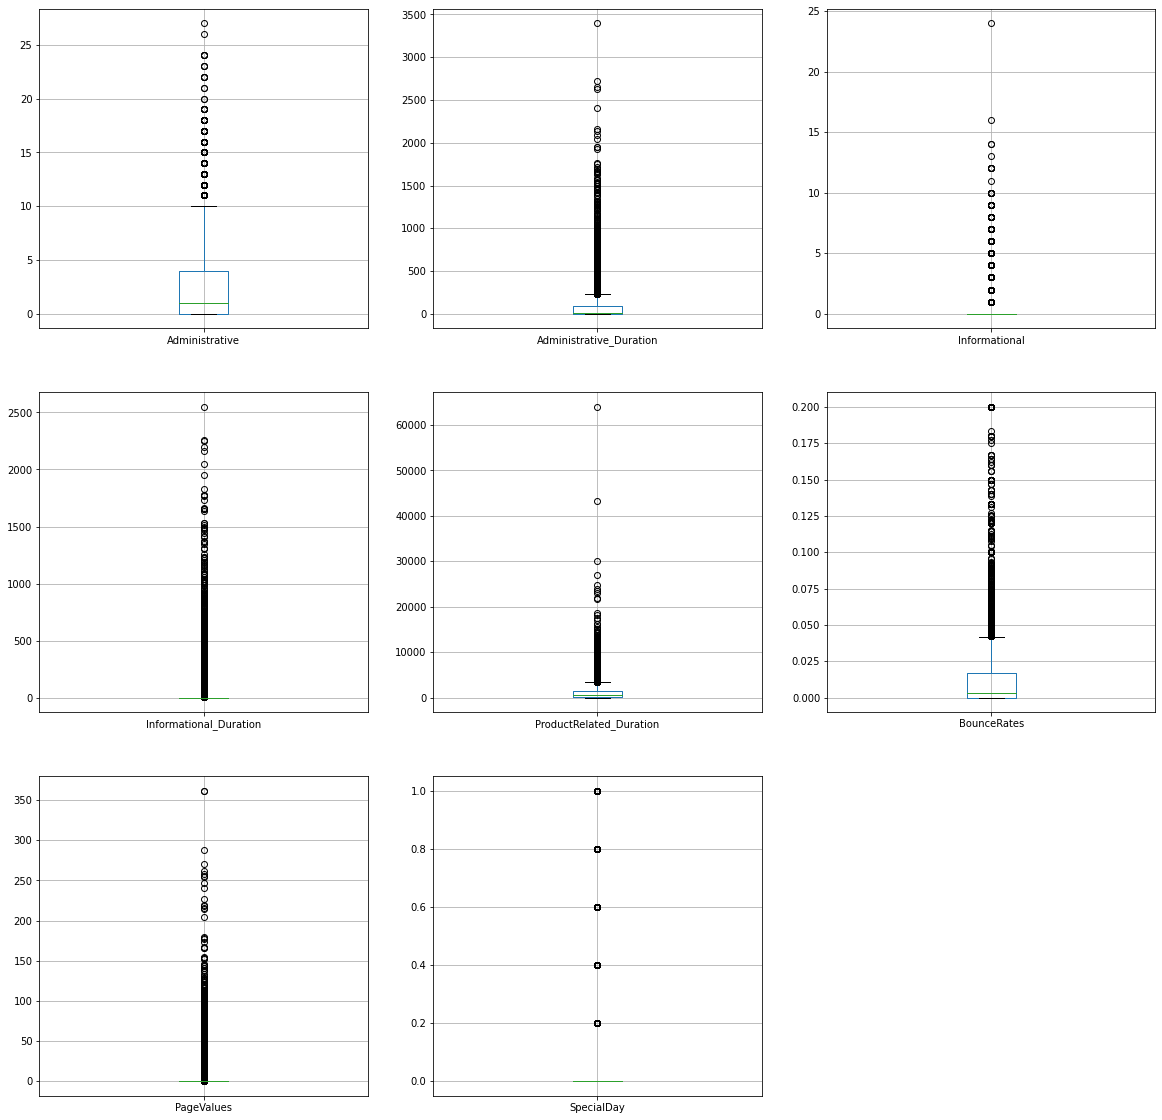

In [26]:
# Detecting outliers
plt.figure(figsize=(20,20))
for i, col in enumerate(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay'], start=1):
    plt.subplot(3, 3, i)
    numerical_df.boxplot(col,whis=1.5)
    
plt.show()

**Data Preprocessing**

**Selecting Model**

In [27]:
#Defining the categorical features
categorical_features = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']

In [28]:
#converting categorical into dummies
preprocessed_dataset = pd.get_dummies(data=dataset, columns=categorical_features)

In [29]:
#Transforming the features using minmaxscaler, thereby preserving the outliers too
scaler = MinMaxScaler()
columns = preprocessed_dataset.columns
preprocessed_dataset = pd.DataFrame(scaler.fit_transform(preprocessed_dataset),columns = columns)

In [30]:
#Defining X and y and splitting the data for training and testing
X = preprocessed_dataset.loc[:, preprocessed_dataset.columns != 'Revenue']
y = preprocessed_dataset.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Exploring different classification algorithms and comparing there accuracy and macro avg**

In [31]:
logistic = LogisticRegression(solver='liblinear', penalty='l1').fit(X_train, y_train)

In [36]:
def evalution(model,X,y):
    y_pred = model.predict(X)

    print(f"CONFUSION MATRIX:\n")
    #Plot confusion matrix
    cm = pd.DataFrame(confusion_matrix(y,y_pred))
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size
    plt.xlabel("Predicted label")
    plt.ylabel("Actual Label")
    plt.show()


    print(f"ACCURACY SCORE:\n{accuracy_score(y, y_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{classification_report(y, y_pred)}")

CONFUSION MATRIX:



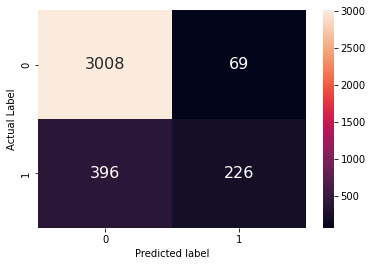

ACCURACY SCORE:
0.8743
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3077
         1.0       0.77      0.36      0.49       622

    accuracy                           0.87      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.86      0.87      0.86      3699



In [37]:
evalution(logistic,X_test,y_test)

CONFUSION MATRIX:



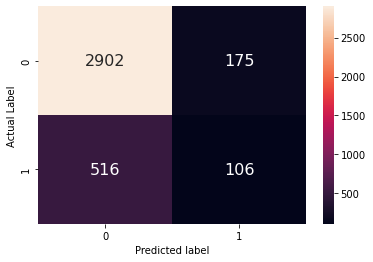

ACCURACY SCORE:
0.8132
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      3077
         1.0       0.38      0.17      0.23       622

    accuracy                           0.81      3699
   macro avg       0.61      0.56      0.56      3699
weighted avg       0.77      0.81      0.78      3699



In [38]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
evalution(knn,X_test,y_test)

CONFUSION MATRIX:



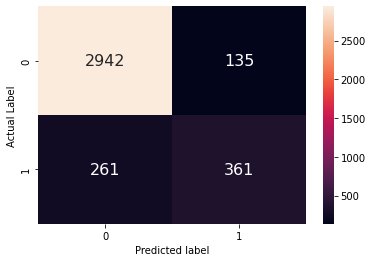

ACCURACY SCORE:
0.8929
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      3077
         1.0       0.73      0.58      0.65       622

    accuracy                           0.89      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.89      0.89      3699



In [39]:
GradientBoostingClassifier = GradientBoostingClassifier().fit(X_train, y_train)
evalution(GradientBoostingClassifier,X_test,y_test)

In [40]:
def evalution_sequential(y,y_pred):
    print(f"CONFUSION MATRIX:\n")
    #Plot confusion matrix
    cm = pd.DataFrame(confusion_matrix(y,y_pred))
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size
    plt.xlabel("Predicted label")
    plt.ylabel("Actual Label")
    plt.show()
    
    print(f"ACCURACY SCORE:\n{accuracy_score(y, y_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{classification_report(y, y_pred)}")

68/68 [==============================] - 2s 5ms/step - loss: 0.5929 - accuracy: 0.8337
Epoch 2/20
68/68 [==============================] - 0s 5ms/step - loss: 0.4173 - accuracy: 0.8510
Epoch 3/20
68/68 [==============================] - 0s 4ms/step - loss: 0.3890 - accuracy: 0.8510
Epoch 4/20
68/68 [==============================] - 0s 4ms/step - loss: 0.3786 - accuracy: 0.8510
Epoch 5/20
68/68 [==============================] - 0s 5ms/step - loss: 0.3706 - accuracy: 0.8510
Epoch 6/20
68/68 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.8510
Epoch 7/20
68/68 [==============================] - 0s 5ms/step - loss: 0.3569 - accuracy: 0.8510
Epoch 8/20
68/68 [==============================] - 0s 5ms/step - loss: 0.3503 - accuracy: 0.8510
Epoch 9/20
68/68 [==============================] - 0s 5ms/step - loss: 0.3440 - accuracy: 0.8512
Epoch 10/20
68/68 [==============================] - 0s 6ms/step - loss: 0.3380 - accuracy: 0.8515
Epoch 11/20
68/68 [===========

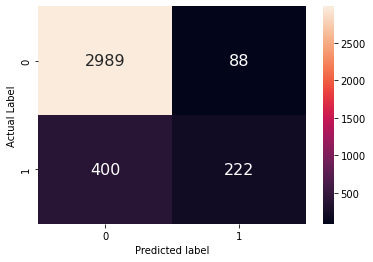

ACCURACY SCORE:
0.8681
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      3077
         1.0       0.72      0.36      0.48       622

    accuracy                           0.87      3699
   macro avg       0.80      0.66      0.70      3699
weighted avg       0.85      0.87      0.85      3699



In [41]:
model = Sequential()
model.add(Dense(12, activation='relu', autocast = False))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128)
y_pred = np.where(model.predict(X_test)>0.5, 1, 0)
evalution_sequential(y_test,y_pred)

CONFUSION MATRIX:



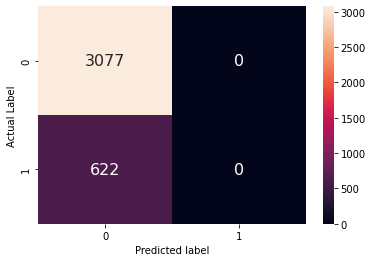

ACCURACY SCORE:
0.8318
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      3077
         1.0       0.00      0.00      0.00       622

    accuracy                           0.83      3699
   macro avg       0.42      0.50      0.45      3699
weighted avg       0.69      0.83      0.76      3699



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
svc = SVC(kernel='rbf', C=0.025, probability=True).fit(X_train, y_train)
evalution(svc, X_test, y_test)

CONFUSION MATRIX:



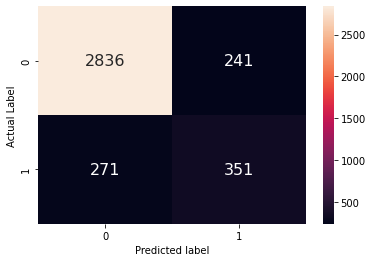

ACCURACY SCORE:
0.8616
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      3077
         1.0       0.59      0.56      0.58       622

    accuracy                           0.86      3699
   macro avg       0.75      0.74      0.75      3699
weighted avg       0.86      0.86      0.86      3699



In [43]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
evalution(decision_tree, X_test, y_test)

CONFUSION MATRIX:



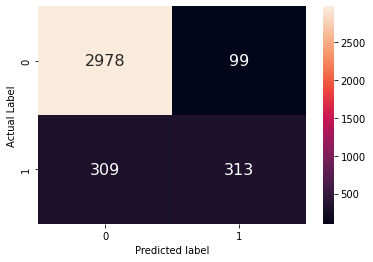

ACCURACY SCORE:
0.8897
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      3077
         1.0       0.76      0.50      0.61       622

    accuracy                           0.89      3699
   macro avg       0.83      0.74      0.77      3699
weighted avg       0.88      0.89      0.88      3699



In [44]:
random_forest = RandomForestClassifier().fit(X_train, y_train)
evalution(random_forest, X_test, y_test)

CONFUSION MATRIX:



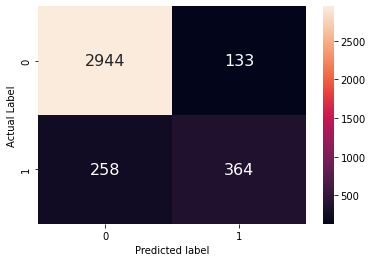

ACCURACY SCORE:
0.8943
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      3077
         1.0       0.73      0.59      0.65       622

    accuracy                           0.89      3699
   macro avg       0.83      0.77      0.79      3699
weighted avg       0.89      0.89      0.89      3699



In [45]:
xgb = XGBClassifier().fit(X_train, y_train)
evalution(xgb, X_test, y_test)

CONFUSION MATRIX:



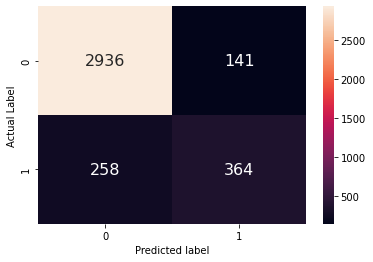

ACCURACY SCORE:
0.8921
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      3077
         1.0       0.72      0.59      0.65       622

    accuracy                           0.89      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.89      0.89      3699



In [46]:
lgbm = LGBMClassifier().fit(X_train, y_train)
evalution(lgbm, X_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


CONFUSION MATRIX:



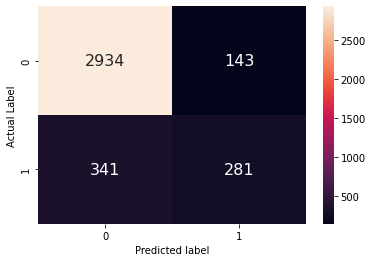

ACCURACY SCORE:
0.8692
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      3077
         1.0       0.66      0.45      0.54       622

    accuracy                           0.87      3699
   macro avg       0.78      0.70      0.73      3699
weighted avg       0.86      0.87      0.86      3699



In [47]:
mlp = MLPClassifier().fit(X_train, y_train)
evalution(mlp, X_test, y_test)

**we are predicting a true or false value for revenue, and considered several classification machine learning models for that. The models that we considered were given in the coding above. we used machine learning pipeline from scikit learn for displaying confusion, accuracy, and classification report for each classifier. For the model selection, we used F1 measure because it is a harmonic mean between precision and recall. F1 measure accounts for an imbalance in classes of the target variable. From this exploration we noticed that the Gradient Boosting Classifier algorithm performed better than all the others with 0.79 macro average and an accuracy of 89 percent.**

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance. One approach to addressing imbalanced datasets is to oversample the minority class

**Using SMOTE to balance our dataset**

In [48]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Exploring the same set of models with the balanced dataset and comparing their performances**

CONFUSION MATRIX:



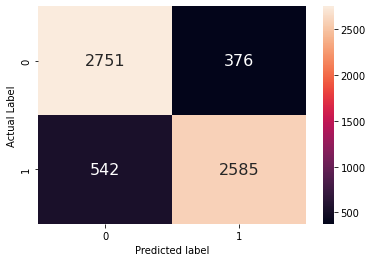

ACCURACY SCORE:
0.8532
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      3127
         1.0       0.87      0.83      0.85      3127

    accuracy                           0.85      6254
   macro avg       0.85      0.85      0.85      6254
weighted avg       0.85      0.85      0.85      6254



In [50]:
logistic = LogisticRegression(solver='liblinear', penalty='l1').fit(X_train, y_train)
evalution(logistic,X_test,y_test)

CONFUSION MATRIX:



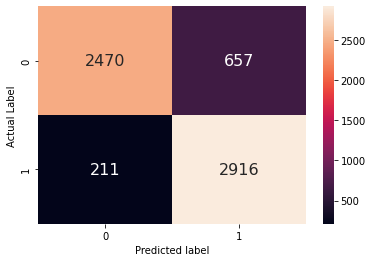

ACCURACY SCORE:
0.8612
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      3127
         1.0       0.82      0.93      0.87      3127

    accuracy                           0.86      6254
   macro avg       0.87      0.86      0.86      6254
weighted avg       0.87      0.86      0.86      6254



In [51]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
evalution(knn,X_test,y_test)

Epoch 1/20
114/114 [==============================] - 1s 4ms/step - loss: 0.6571 - accuracy: 0.6119
Epoch 2/20
114/114 [==============================] - 0s 4ms/step - loss: 0.5935 - accuracy: 0.6850
Epoch 3/20
114/114 [==============================] - 1s 5ms/step - loss: 0.5625 - accuracy: 0.7061
Epoch 4/20
114/114 [==============================] - 1s 5ms/step - loss: 0.5365 - accuracy: 0.7264
Epoch 5/20
114/114 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.7530
Epoch 6/20
114/114 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.7742
Epoch 7/20
114/114 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.7934
Epoch 8/20
114/114 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.8153
Epoch 9/20
114/114 [==============================] - 0s 4ms/step - loss: 0.4093 - accuracy: 0.8231
Epoch 10/20
114/114 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.8356

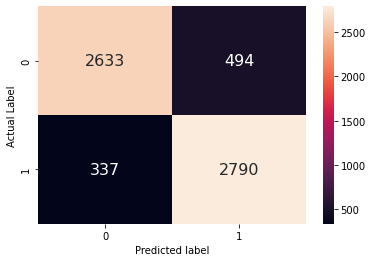

ACCURACY SCORE:
0.8671
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      3127
         1.0       0.85      0.89      0.87      3127

    accuracy                           0.87      6254
   macro avg       0.87      0.87      0.87      6254
weighted avg       0.87      0.87      0.87      6254



In [52]:
model = Sequential()
model.add(Dense(12, activation='relu', autocast = False))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128)
y_pred = np.where(model.predict(X_test)>0.5, 1, 0)
evalution_sequential(y_test,y_pred)

CONFUSION MATRIX:



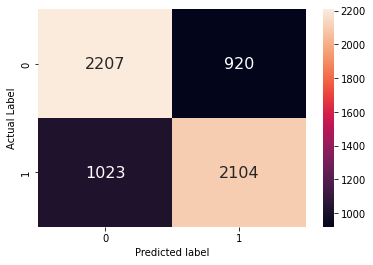

ACCURACY SCORE:
0.6893
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.69      3127
         1.0       0.70      0.67      0.68      3127

    accuracy                           0.69      6254
   macro avg       0.69      0.69      0.69      6254
weighted avg       0.69      0.69      0.69      6254



In [53]:
svc = SVC(kernel='rbf', C=0.025, probability=True).fit(X_train, y_train)
evalution(svc, X_test, y_test)

CONFUSION MATRIX:



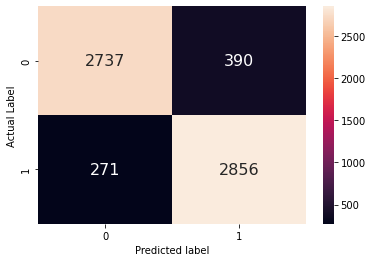

ACCURACY SCORE:
0.8943
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      3127
         1.0       0.88      0.91      0.90      3127

    accuracy                           0.89      6254
   macro avg       0.89      0.89      0.89      6254
weighted avg       0.89      0.89      0.89      6254



In [54]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
evalution(decision_tree, X_test, y_test)

CONFUSION MATRIX:



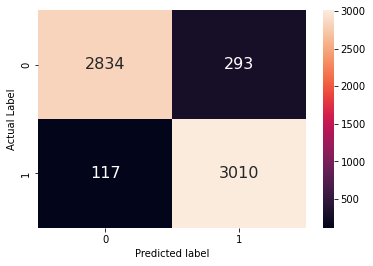

ACCURACY SCORE:
0.9344
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93      3127
         1.0       0.91      0.96      0.94      3127

    accuracy                           0.93      6254
   macro avg       0.94      0.93      0.93      6254
weighted avg       0.94      0.93      0.93      6254



In [55]:
random_forest = RandomForestClassifier().fit(X_train, y_train)
evalution(random_forest, X_test, y_test)

CONFUSION MATRIX:



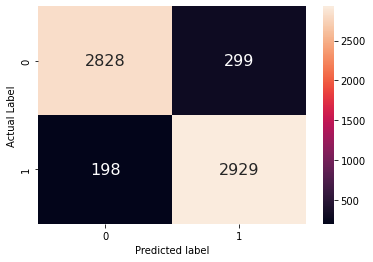

ACCURACY SCORE:
0.9205
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92      3127
         1.0       0.91      0.94      0.92      3127

    accuracy                           0.92      6254
   macro avg       0.92      0.92      0.92      6254
weighted avg       0.92      0.92      0.92      6254



In [56]:
xgb = XGBClassifier().fit(X_train, y_train)
evalution(xgb, X_test, y_test)

CONFUSION MATRIX:



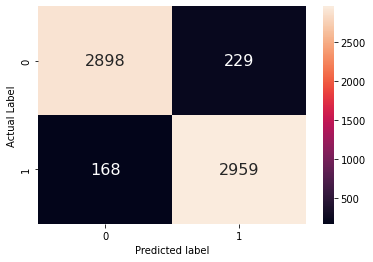

ACCURACY SCORE:
0.9365
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      3127
         1.0       0.93      0.95      0.94      3127

    accuracy                           0.94      6254
   macro avg       0.94      0.94      0.94      6254
weighted avg       0.94      0.94      0.94      6254



In [57]:
lgbm = LGBMClassifier().fit(X_train, y_train)
evalution(lgbm, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


CONFUSION MATRIX:



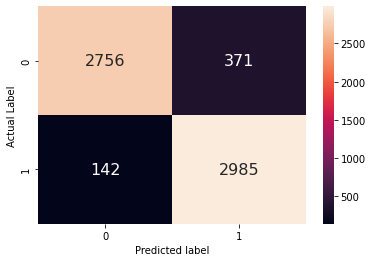

ACCURACY SCORE:
0.9180
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      3127
         1.0       0.89      0.95      0.92      3127

    accuracy                           0.92      6254
   macro avg       0.92      0.92      0.92      6254
weighted avg       0.92      0.92      0.92      6254



In [58]:
mlp = MLPClassifier().fit(X_train, y_train)
evalution(mlp, X_test, y_test)

**So after balancing the dataset and running through all the models again, random forest classifier provides best macro avg of 0.93 and an accuracy score of 0.93**